In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv("stocks.csv")
df.head()


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [2]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.isnull().sum()  # Check missing values


Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

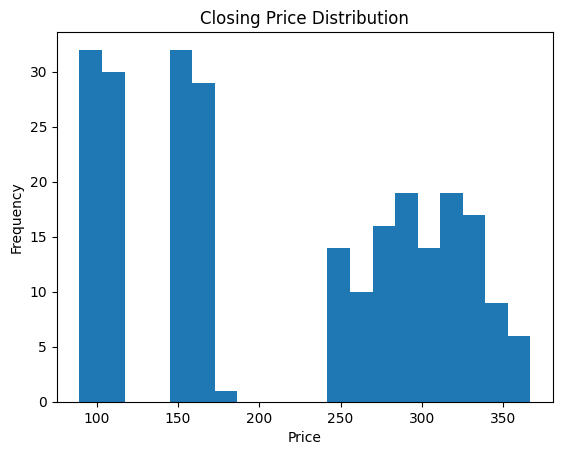

In [3]:
plt.hist(df['Close'], bins=20)
plt.title("Closing Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


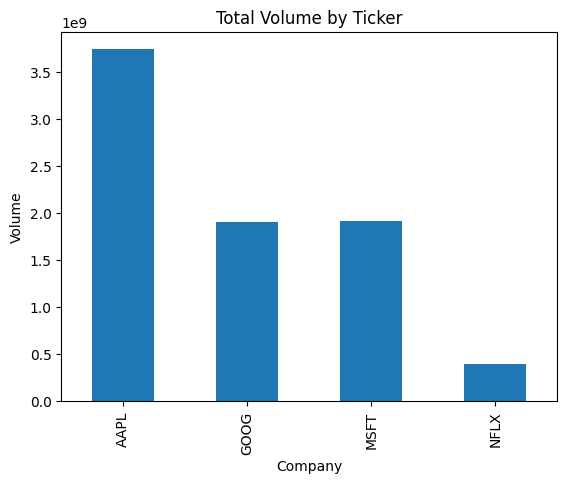

In [4]:
volume_by_ticker = df.groupby('Ticker')['Volume'].sum()
volume_by_ticker.plot(kind='bar', title="Total Volume by Ticker")
plt.xlabel("Company")
plt.ylabel("Volume")
plt.show()


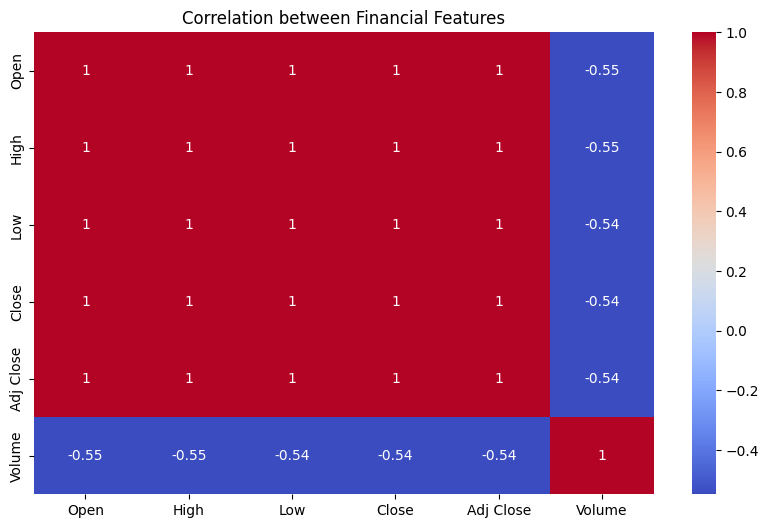

In [5]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation between Financial Features")
plt.show()


In [6]:
# Example for AAPL
aapl = df[df['Ticker'] == 'AAPL'].copy()
aapl['MA_5'] = aapl['Close'].rolling(window=5).mean()
aapl['Daily_Return'] = aapl['Close'].pct_change()
aapl['Volatility'] = aapl['Close'].rolling(window=5).std()


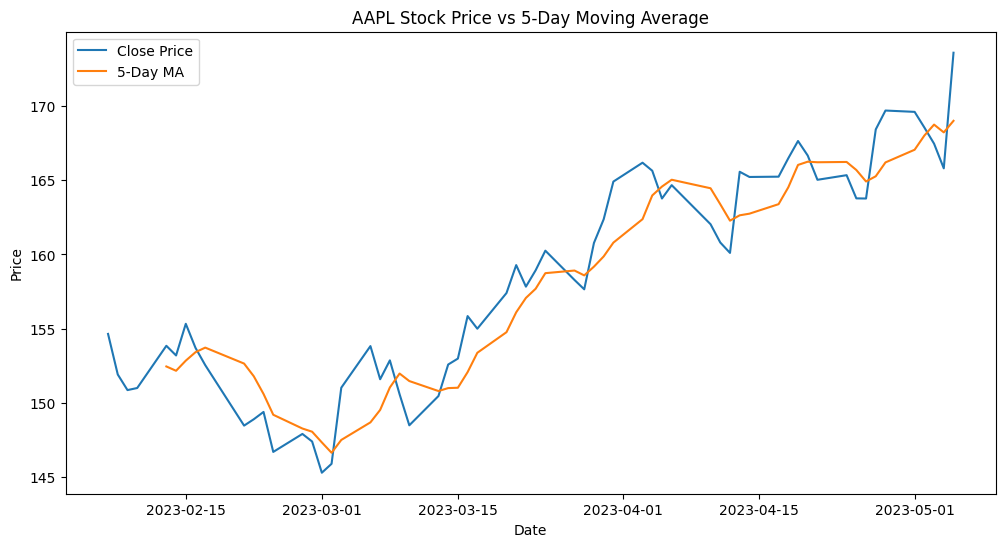

In [7]:
plt.figure(figsize=(12,6))
plt.plot(aapl['Date'], aapl['Close'], label='Close Price')
plt.plot(aapl['Date'], aapl['MA_5'], label='5-Day MA')
plt.title("AAPL Stock Price vs 5-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


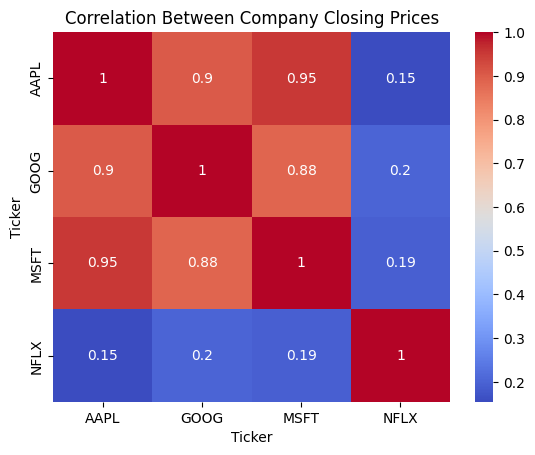

In [8]:
pivot_close = df.pivot(index='Date', columns='Ticker', values='Close')
sns.heatmap(pivot_close.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Company Closing Prices")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = aapl[['Open', 'High', 'Low', 'Volume']]
y = aapl['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.9854542039468671
